In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import axis
from mpl_toolkits.mplot3d import Axes3D

In [2]:
output_folder = './materijali/zad6-outputs/'

### 5. Membership functions

In [3]:
batch_input_file = output_folder + 'batch-membership-functions.txt'
online_input_file = output_folder + 'online-membership-functions.txt'
num_rules = 8
num_elements = 1001

In [4]:
batch_A = []
batch_B = []

online_A = []
online_B = []

with open(batch_input_file, 'r') as f:
    x = np.fromstring(f.readline(), count=num_elements, sep=',')
    
    for i in range(num_rules):
        batch_A.append(np.fromstring(f.readline(), count=num_elements, sep=','))
        batch_B.append(np.fromstring(f.readline(), count=num_elements, sep=','))
        
with open(online_input_file, 'r') as f:
    f.readline()
    
    for i in range(num_rules):
        online_A.append(np.fromstring(f.readline(), count=num_elements, sep=','))
        online_B.append(np.fromstring(f.readline(), count=num_elements, sep=','))

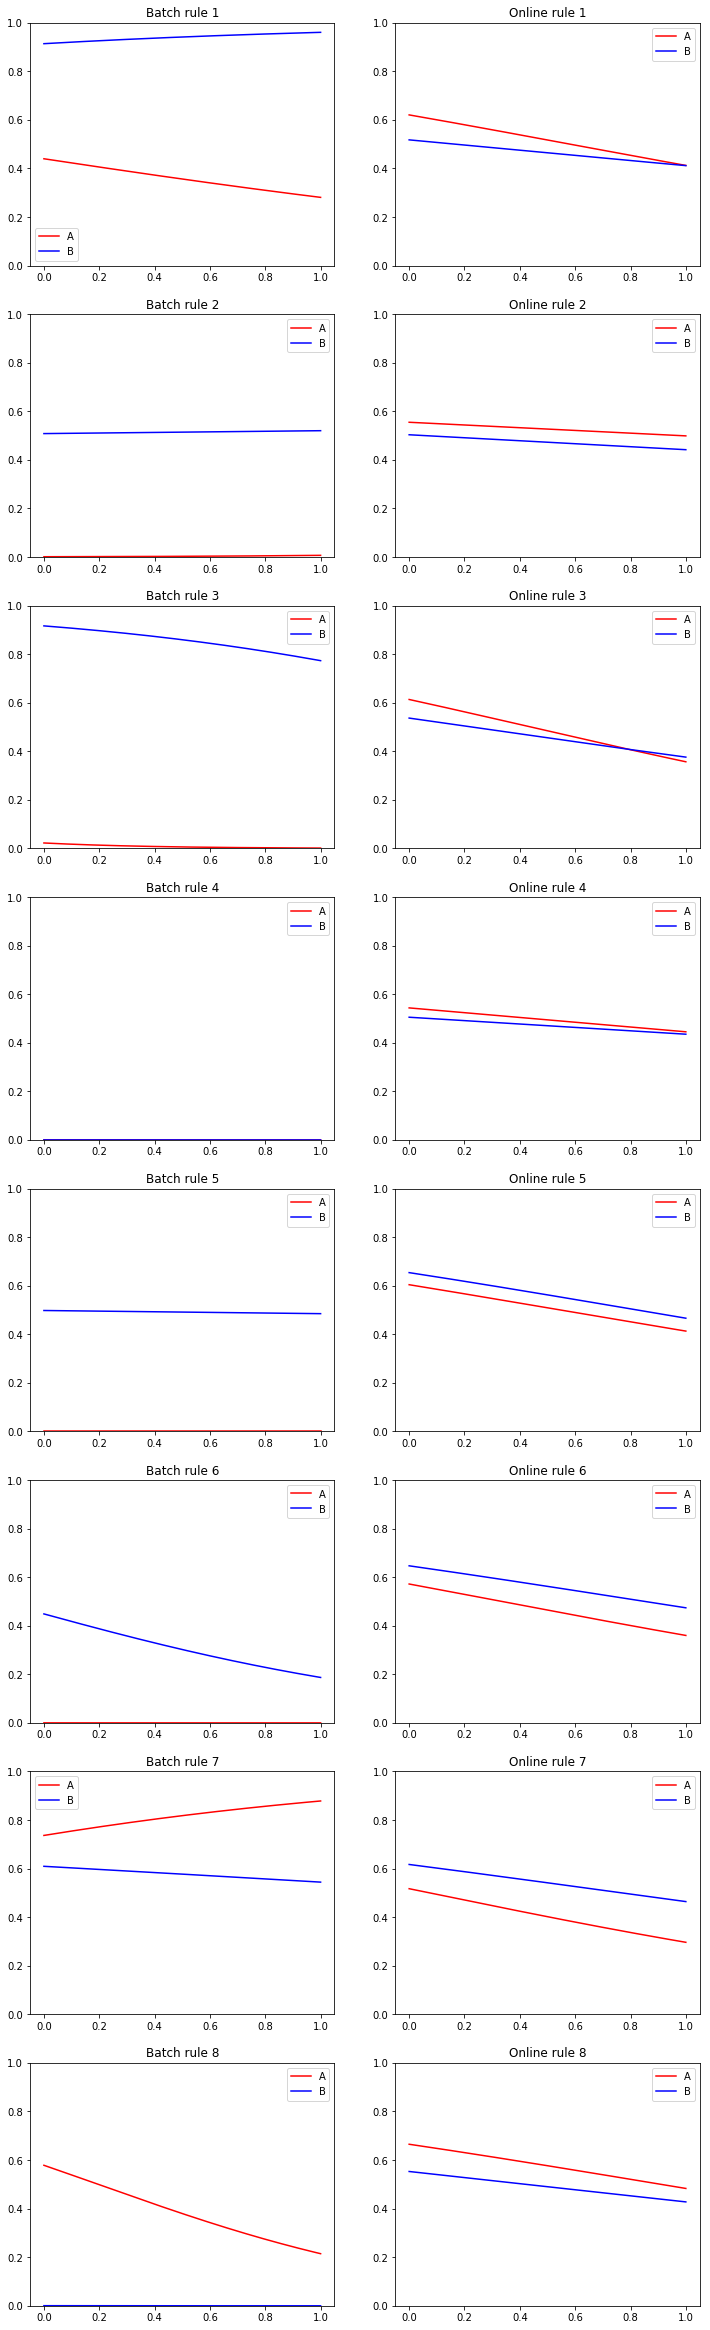

In [5]:
_, axs = plt.subplots(8, 2, figsize=(12, 42))
for i in range(num_rules):
    axs[i, 0].plot(x, batch_A[i], label='A', c='r')
    axs[i, 0].plot(x, batch_B[i], label='B', c='b')
    axs[i, 0].set_ylim(0, 1)
    axs[i, 0].set_title('Batch rule ' + str(i + 1))
    axs[i, 0].legend()
    
    axs[i, 1].plot(x, online_A[i], label='A', c='r')
    axs[i, 1].plot(x, online_B[i], label='B', c='b')
    axs[i, 1].set_ylim(0, 1)
    axs[i, 1].set_title('Online rule ' + str(i + 1))
    axs[i, 1].legend()
plt.show()

### 6. δ(x, y)

In [6]:
batch_input_file = output_folder + 'batch-test-error.txt'
online_input_file = output_folder + 'online-test-error.txt'
num_elements = 81

In [7]:
def plot_3d(xs, ys, zs, title):
    data_dict = {}
    for x, y, z in zip(xs, ys, zs):
        data_dict[(x, y)] = z

    x = np.arange(-4, 5, 1)
    y = np.arange(-4, 5, 1)
    X, Y = np.meshgrid(x, y)

    Z = []

    for a, b in zip(X, Y):
        z = []

        for xd, yd in zip(a, b):
            z.append(data_dict[(xd, yd)])

        Z.append(z)

    Z = np.array(Z)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(title)
    ax.plot_wireframe(X, Y, Z)
    plt.show()

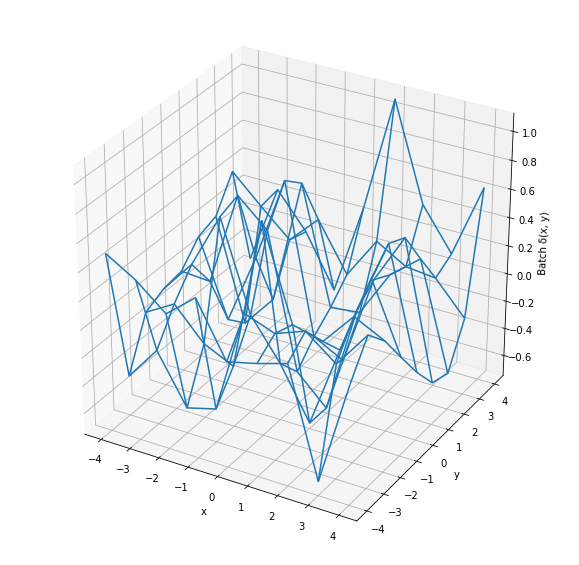

In [8]:
with open(batch_input_file, 'r') as f:
    xs = np.fromstring(f.readline(), count=num_elements, sep=',')
    ys = np.fromstring(f.readline(), count=num_elements, sep=',')
    zs = np.fromstring(f.readline(), count=num_elements, sep=',')
    
plot_3d(xs, ys, zs, 'Batch δ(x, y)')

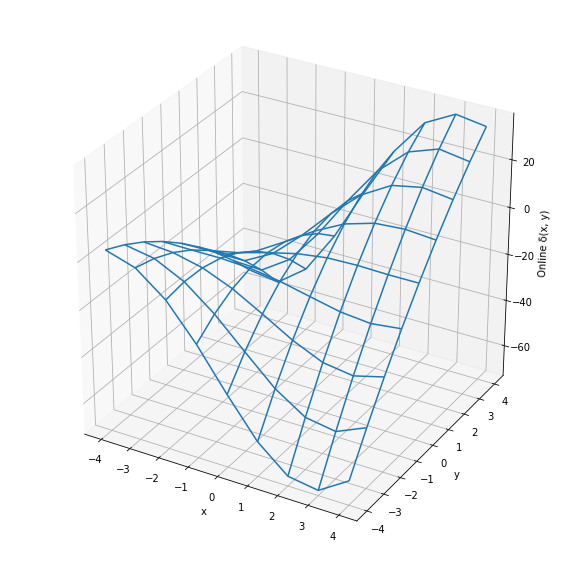

In [9]:
with open(online_input_file, 'r') as f:
    xs = np.fromstring(f.readline(), count=num_elements, sep=',')
    ys = np.fromstring(f.readline(), count=num_elements, sep=',')
    zs = np.fromstring(f.readline(), count=num_elements, sep=',')
    
plot_3d(xs, ys, zs, 'Online δ(x, y)')

### 7. Train errors

In [10]:
def open_train_errors(input_file, num_elements):
    with open(input_file, 'r') as f:
        x = np.fromstring(f.readline(), count=num_elements, sep=',')
        y = np.fromstring(f.readline(), count=num_elements, sep=',')
    return x, y

In [11]:
batch_input_file = output_folder + 'batch-train-errors.txt'
online_input_file = output_folder + 'online-train-errors.txt'
num_elements = 10000

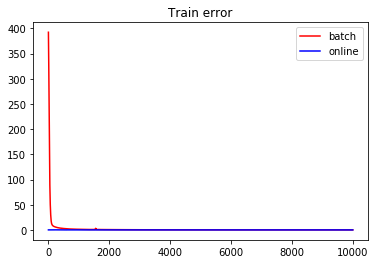

In [12]:
batch_x, batch_y = open_train_errors(batch_input_file, num_elements)
online_x, online_y = open_train_errors(online_input_file, num_elements)

plt.plot(batch_x, batch_y, label='batch', c='r')
plt.plot(online_x, online_y, label='online', c='b')
plt.title('Train error')
plt.legend()
plt.show()

### 8. Learning rates

In [13]:
batch_input_filename = '-batch-train-errors.txt'
online_input_filename = '-online-train-errors.txt'

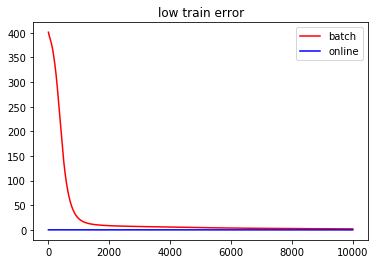

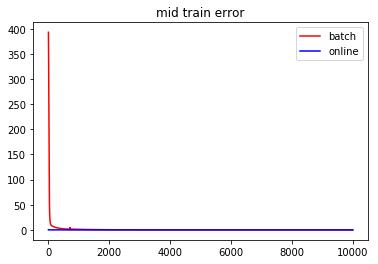

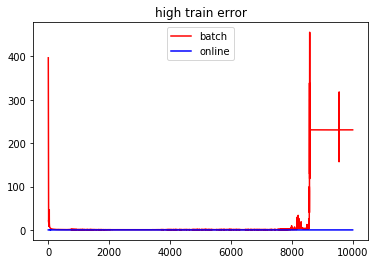

In [14]:
for prefix in ['low', 'mid', 'high']:
    batch_x, batch_y = open_train_errors(output_folder + prefix + batch_input_filename, num_elements)
    online_x, online_y = open_train_errors(output_folder + prefix + online_input_filename,num_elements)

    plt.plot(batch_x, batch_y, label='batch', c='r')
    plt.plot(online_x, online_y, label='online', c='b')
    plt.title(prefix + ' train error')
    plt.legend()
    plt.show()